In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [51]:
diabetes = datasets.load_diabetes()

In [50]:
print(diabetes['feature_names'])
print(diabetes['data'].shape)
print(diabetes['target'].shape)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
(442, 10)
(442,)


In [52]:
X = diabetes['data'][:,2] # Only 1 predictor we are using bmi
y = diabetes['target']

In [53]:
# Simple Linear Regression
class SimpleLinearRegression():
    def __init__(self):
      pass

    def fit(self, X, y):
       sum_X = sum(X)
       sum_y = sum(y)
       sum_xy = sum(np.multiply(X,y))
       sum_x2 = sum(np.multiply(X,X))

       self.n= len(X)

       # m = (n*sum(xy) - sumx*sumy) / (n*sum(x^2) - (sumx)^2)
       self.m = ((self.n* sum_xy) - (sum_X * sum_y)) / ((self.n* sum_x2) - (sum_X**2))

       # b = (sumy - (m*sumx)) / n
       self.b = ((sum_y - (self.m * sum_X)) / self.n)

       # MSE = (1/n) * sum((y - (m*X + b))^2)
       self.MSE = ((1/self.n) * sum((y - (self.m * np.array(X) + self.b))**2))

       # SSR = sum((y - m*X+b)^2)
       self.SSR = sum((np.array(y) - (self.m * np.array(X) + self.b))**2)

       # SST = sum((y - y_mean)^2)
       self.SST = sum((np.array(y) - (sum_y/self.n))**2)

       # R-Squared = 1 - SSR/SST
       self.R2 = 1 - (self.SSR/self.SST)
    
    def predict(self, X):
        y = self.m * np.array(X) + self.b
        return y

In [54]:
slr = SimpleLinearRegression()
slr.fit(X,y)
print("Intercept: ", slr.b)
print("Slope: ", slr.m)
print("Mean Square Error: ", slr.MSE)
print("R-Squared: ", slr.R2)

Intercept:  152.13348416289617
Slope:  949.435260384039
Mean Square Error:  3890.4565854612747
R-Squared:  0.34392376022537996


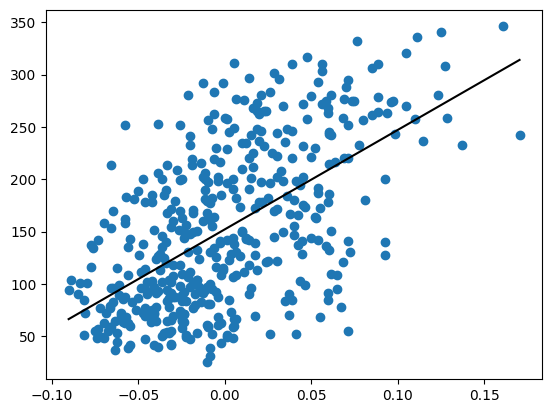

In [71]:
plt.scatter(X, y)
line_x = np.linspace(X.min(),X.max(), 100)
line_y = slr.m*line_x + slr.b 
plt.plot(line_x, line_y, color = "black")
plt.show()

In [76]:
class OLSLinearRegression():
    def __init__(self):
        pass
    
    def fit(self, X, y):
        # Adding column of 1's, beta_0
        x = np.hstack((np.ones((X.shape[0], 1)), X))

        # B = (X^T * X)^(-1) * X^T * y
        self.beta = np.linalg.inv(x.T @ x) @ x.T @ y

        # Error Term = Y - B * X
        self.epsilon = np.array(y) - np.dot(x, self.beta)

        # MSE = E^2 / (N- P - 1)
        self.MSE = np.dot(self.epsilon.T, self.epsilon) / (X.shape[0] - (X.shape[1] + 1)) 
        self.SSE = np.dot(self.epsilon.T, self.epsilon)
        self.SST = sum((np.array(y) - sum(np.array(y))/y.shape[0])**2)
        self.R2 = 1 - self.SSE/self.SST
    
    def predict(self, X):
        prediction = np.dot(X, self.beta)
        return prediction

In [75]:
# 3 predictors, using Sepal length, Sepal width, and petal

X = diabetes['data']
y = diabetes['target']

In [81]:
o = OLSLinearRegression()
o.fit(X, y)
print("Mean Square Error: ", o.MSE)
print("R-Squared: ", o.R2)

Mean Square Error:  2932.6816372003323
R-Squared:  0.5177484222203499


In [88]:
# Linear Regression with gradient descent

class LinearRegression():

    def __init__(self, lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Ensure the y is flattened
        y = y.flatten()


        for _ in range(self.n_iters):

            # Y = X*w + b
            y_predicted = np.dot(X, self.weights) + self.bias

            # Derivative of the MSE w/ respect to the weight: (2/N) * -sum X*(y - y_predicted)
            dw = (1/n_samples) * 2 * np.dot(X.T, (y_predicted - y))

            # Derivative of the MSE w/ respect to the bias: (2/N) * -sum(y - y_predicted)
            db = (1/n_samples) * 2 * np.sum(y_predicted - y)

            self.weights -= self.lr*dw
            self.bias -= self.lr * db

        # Loss = MSE
        self.loss = sum((y - np.dot(X, self.weights) + self.bias)**2)/n_samples

    def predict(self, X):
        y = np.dot(X, self.weights) + self.bias
        return y
    

In [89]:
lr = LinearRegression()
lr.fit(X, y)
print("Loss (MSE): ", lr.loss)

Loss (MSE):  86349.39659368846


In [25]:
breast_cancer = datasets.load_breast_cancer()

In [90]:
print(breast_cancer['feature_names'])
print(breast_cancer['target_names'])
print(breast_cancer['data'].shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
(569, 30)


In [24]:
# Logistic Regression

class LogisitcRegression():
    
    def __init__(self, lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []


    def _sigmoid(self, x):
        return 1 / ( 1 + np.exp(-x) )
    

    def get_loss(self, y, y_pred):
        loss = np.mean(-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred))
        return loss


    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_samples)
        self.bias = 0

        for _ in range(self.n_iters):

            z = np.dot(X, self.weights) + self.bias
            y_prediction = self._sigmoid(z)

            dw = (1 / n_samples) * 2 * np.dot(X.T, y_prediction - y)

            db = (1 / n_samples) * 2 * np.sum(y_prediction - y)

            self.weights -= self.lr * dw

            self.bias -= self.lr * db

        
    def predict(self, X):

        threshold = 0.5

        z = np.dot(X, self.weights) + self.bias
        y_prediction = self._sigmoid(z)

        return np.array([1 if i > threshold else 0 for i in y_prediction])